In [20]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('data/winequality-red.csv')

In [21]:
# Display information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
# Check for missing values
data.isna().sum()

# Drop rowns with missing values
data.dropna(inplace=True)

# Remove duplicate data
data.drop_duplicates(keep='first')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


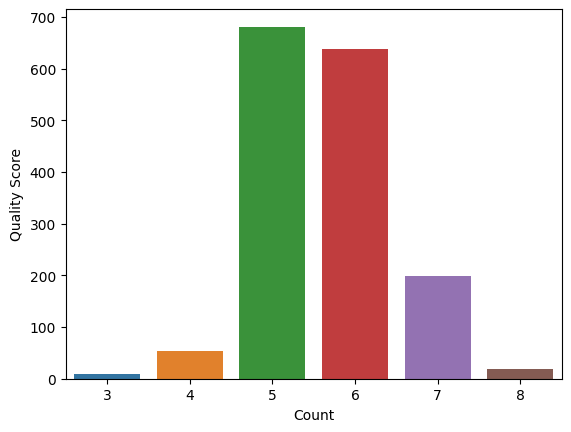

In [23]:
# Wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x='quality')
plt.xlabel('Count')
plt.ylabel('Quality Score')

plt.show()

In [24]:
# Preparing the dataset for binary classification

# Label quality into good or bad
data['quality'] = data['quality'].apply(lambda x: 1 if x>=6.0 else 0)

# Display data
data.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


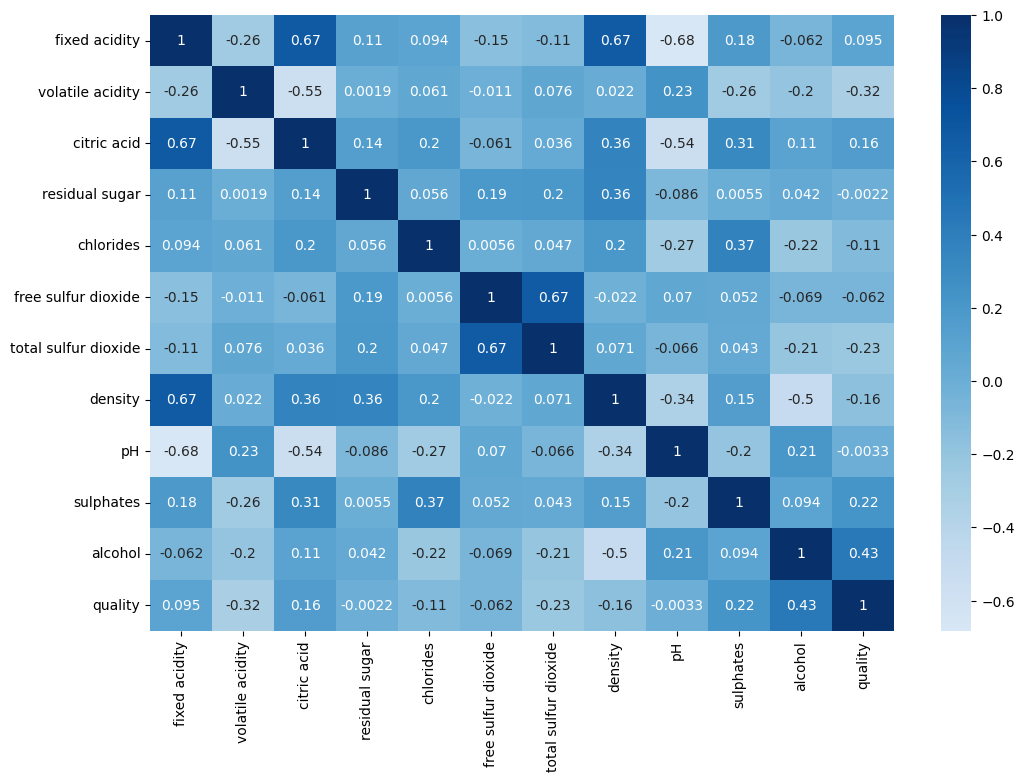

In [25]:
# Gaining insights from the correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues', annot=True)

plt.show()

In [26]:
# Prepare the dataset for model training

# Drop the target variable
X = data.drop('quality', axis=1)

# Set the target variable as the label
y= data['quality']


In [27]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
# Applying logistic regression

# Create an object of the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predict the labels of the test data
y_pred = logreg_model.predict(X_test)

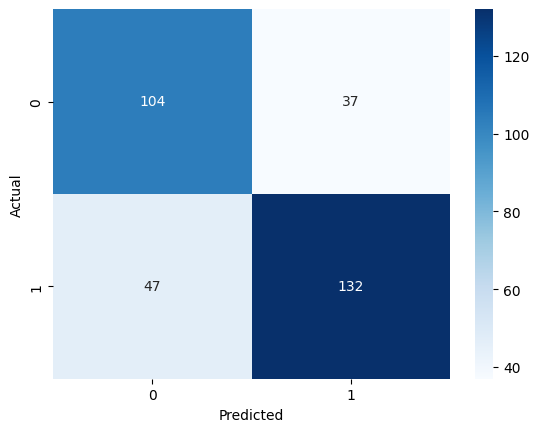

In [30]:
# Evaluating model performance

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model performance testing metrics

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision of the model
precision = precision_score(y_test, y_pred)

# Compute the recall of the model
recall = recall_score(y_test, y_pred)

# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7375
Precision: 0.7810650887573964
Recall: 0.7374301675977654
F1 score: 0.7586206896551725


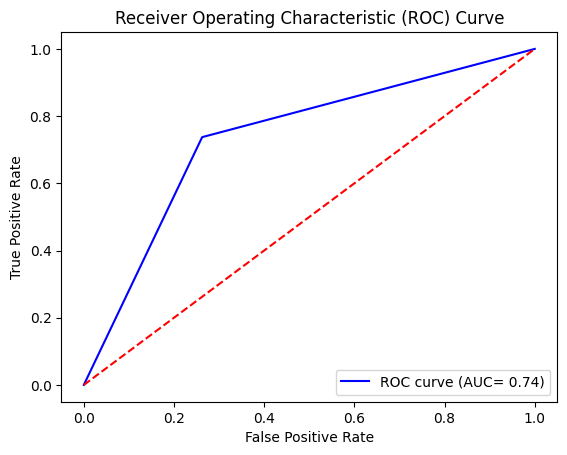

In [32]:
# ROC and AUC

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.figure(dpi=100)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC= %0.2f)' %auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.savefig("figures/roc_curve.png", dpi=300)
plt.show()

In [33]:
# TODO 3

# Eliminating erelavant features from the dataset used in the model
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.6:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

{'density', 'total sulfur dioxide', 'citric acid', 'pH'}


In [34]:
# Remove the correlated features from the dataset
X_train.drop(labels= correlated_features, axis = 1, inplace= True)
X_test.drop(labels= correlated_features, axis = 1, inplace= True)

In [35]:
# Test the model for performance again

# Applying logistic regression

# Create an object of the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train, y_train)
# Predict the labels of the test data
y_pred = logreg_model.predict(X_test)

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model performance testing metrics

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision of the model
precision = precision_score(y_test, y_pred)

# Compute the recall of the model
recall = recall_score(y_test, y_pred)

# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.734375
Precision: 0.8012820512820513
Recall: 0.6983240223463687
F1 score: 0.746268656716418


In [36]:
# Optimize the model performance

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Define a few parameters that can be used for tuning
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-3,3,7),
    'solver': ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
}

# Get a logistic regression model after hyper parameter tuning
clf= GridSearchCV(logreg_model, param_grid= parameters, scoring= 'precision', cv=10)

# Train the dataset
clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Precision :",clf.best_score_)


Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision : 0.7650612276768669


In [37]:
logreg = LogisticRegression(C = 1000.0, 
                            penalty = 'l2', 
                            solver = 'lbfgs')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision of the model
precision = precision_score(y_test, y_pred)

# Compute the recall of the model
recall = recall_score(y_test, y_pred)

# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7375
Precision: 0.802547770700637
Recall: 0.7039106145251397
F1 score: 0.7500000000000001


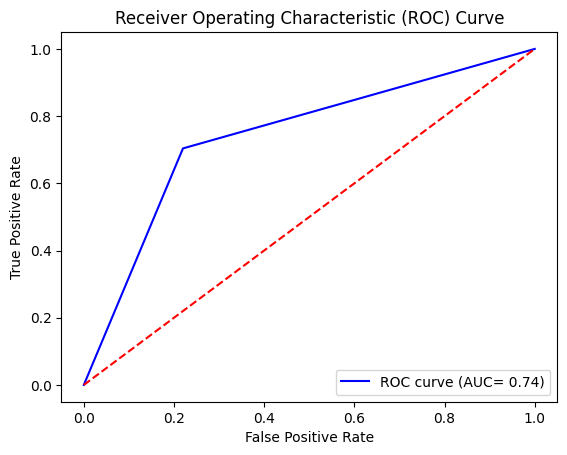

In [38]:
# ROC and AUC

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.figure(dpi=100)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC= %0.2f)' %auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.savefig("figures/roc_curve.png", dpi=300)
plt.show()

In [39]:
# Create the Dash app
# external_stylesheets = ['https://fonts.googleapis.com/css2?family=Open+Sans&display=swap']

app = dash.Dash(__name__)
# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

# Define the layout of the dashboard
app.layout = html.Div(
#     style={'font-family': 'Open Sans'}, 
    children=[
    
    html.Div([
        html.H1('CO544-2023 Lab 3: Wine Quality Prediction'),
    ],style={"justify-content": "center", "align-items": "center"}),
        
    
    html.Div([
        html.H3('Exploratory Data Analysis'),
        html.Label('Feature 1 (X-axis)'),
        dcc.Dropdown(
            id='x_feature',
            options=[{'label': col, 'value': col} for col in data.columns],
            value=data.columns[0]
        )
    ], style={'width': '30%', 'display': 'inline-block'}),
    
    html.Div([
        html.Label('Feature 2 (Y-axis)'),
        dcc.Dropdown(
            id='y_feature',
            options=[{'label': col, 'value': col} for col in data.columns],
            value=data.columns[1]
        )
    ], style={'width': '30%', 'display': 'inline-block'}),
    
    dcc.Graph(id='correlation_plot'),
    
    # Wine quality prediction based on input feature values
    html.H3("Wine Quality Prediction"),
    html.Div([
        html.Label("Fixed Acidity"),
        dcc.Input(id='fixed_acidity', type='number', required=True),    
        html.Label("Volatile Acidity"),
        dcc.Input(id='volatile_acidity', type='number', required=True), 
        html.Label("Citric Acid"),
        dcc.Input(id='citric_acid', type='number', required=True),
        html.Br(),
        
        html.Label("Residual Sugar"),
        dcc.Input(id='residual_sugar', type='number', required=True),  
        html.Label("Chlorides"),
        dcc.Input(id='chlorides', type='number', required=True), 
        html.Label("Free Sulfur Dioxide"),
        dcc.Input(id='free_sulfur_dioxide', type='number', required=True),
        html.Br(),
        
                html.Label("Total Sulfur Dioxide"),
        dcc.Input(id='total_sulfur_dioxide', type='number', required=True),
        html.Label("Density"),
        dcc.Input(id='density', type='number', required=True),
        html.Label("pH"),
        dcc.Input(id='ph', type='number', required=True),
        html.Br(),
        
        html.Label("Sulphates"),
        dcc.Input(id='sulphates', type='number', required=True),
        html.Label("Alcohol"),
        dcc.Input(id='alcohol', type='number', required=True),
        html.Br(),
    ]),

    html.Div([
        html.Button('Predict', id='predict-button', n_clicks=0),
    ]),

    html.Div([
        html.H4("Predicted Quality"),
        html.Div(id='prediction-output')
    ])
])

In [ ]:
# Define the callback to update the correlation plot
@app.callback(
    dash.dependencies.Output('correlation_plot', 'figure'),
    [dash.dependencies.Input('x_feature', 'value'),
     dash.dependencies.Input('y_feature', 'value')]
)
def update_correlation_plot(x_feature, y_feature):
    fig = px.scatter(data, x=x_feature, y=y_feature, color='quality')
    fig.update_layout(title=f"Correlation between {x_feature} and {y_feature}")
    return fig

# Define the callback function to predict wine quality
@app.callback(
    Output(component_id='prediction-output', component_property='children'),
    [Input('predict-button', 'n_clicks')],
    [State('fixed_acidity', 'value'),
     State('volatile_acidity', 'value'),
     State('citric_acid', 'value'),
     State('residual_sugar', 'value'),
     State('chlorides', 'value'),
     State('free_sulfur_dioxide', 'value'),
     State('total_sulfur_dioxide', 'value'),
     State('density', 'value'),
     State('ph', 'value'),
     State('sulphates', 'value'),
     State('alcohol', 'value')]
)
def predict_quality(n_clicks, fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                     chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol):
    # Create input features array for prediction
    input_features = np.array([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, 
                               free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol]).reshape(1, -1)

    # Predict the wine quality (0 = bad, 1 = good)
    prediction = logreg_model.predict(input_features)[0]

    # Return the prediction
    if prediction == 1:
        return 'This wine is predicted to be good quality.'
    else:
        return 'This wine is predicted to be bad quality.'


if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
